In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_excel('horse_kick_data.xlsx')
df.head(15)

,corps,1875,1876,1877,1878,1879,1880,1881,1882,1883,...,1886,1887,1888,1889,1890,1891,1892,1893,1894,total
0,G,0,2,2,1,0,0,1,1,0,...,2,1,0,0,1,0,1,0,1,16
1,I,0,0,0,2,0,3,0,2,0,...,1,1,1,0,2,0,3,1,0,16
2,II,0,0,0,2,0,2,0,0,1,...,0,2,1,1,0,0,2,0,0,12
3,III,0,0,0,1,1,1,2,0,2,...,0,1,0,1,2,1,0,0,0,12
4,IV,0,1,0,1,1,1,1,0,0,...,1,0,0,0,0,1,1,0,0,8
5,V,0,0,0,0,2,1,0,0,1,...,1,0,1,1,1,1,1,1,0,11
6,VI,0,0,1,0,2,0,0,1,2,...,1,3,1,1,1,0,3,0,0,17
7,VII,1,0,1,0,0,0,1,0,1,...,0,2,0,0,2,1,0,2,0,12
8,VIII,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,1,7
9,IX,0,0,0,0,0,2,1,1,1,...,1,1,0,1,2,0,1,0,0,13


In [3]:
df.drop(columns = ['corps', 'total'], inplace = True)
df.drop(index = 14, inplace = True)
df.head()

,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894
0,0,2,2,1,0,0,1,1,0,3,0,2,1,0,0,1,0,1,0,1
1,0,0,0,2,0,3,0,2,0,0,0,1,1,1,0,2,0,3,1,0
2,0,0,0,2,0,2,0,0,1,1,0,0,2,1,1,0,0,2,0,0
3,0,0,0,1,1,1,2,0,2,0,0,0,1,0,1,2,1,0,0,0
4,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0


In [4]:
#X is the database.
X = df.values

#X dimention is 14*20

train_set = X[:, :13]               #Dividing the dataset into training set compraising of first 13 years
test_set = X[:, 13:]                #Dividing the dataset into testing set compraising of last 7 years

print(train_set.shape)
print(test_set.shape)

(14, 13)
(14, 7)


### MLE Estimation

The learnt parametes are as follows:
[[1.        ]
 [0.69230769]
 [0.61538462]
 [0.61538462]
 [0.46153846]
 [0.38461538]
 [0.84615385]
 [0.53846154]
 [0.30769231]
 [0.69230769]
 [0.53846154]
 [1.        ]
 [1.46153846]
 [0.30769231]]
The RMSE error of the prediction for each corps are as follows:
[[0.75592895]
 [1.11244402]
 [0.72975638]
 [0.72975638]
 [0.48476363]
 [0.58798911]
 [0.98980432]
 [0.89801133]
 [0.50942097]
 [0.73839285]
 [1.15969215]
 [1.13389342]
 [1.02380789]
 [0.94121376]]


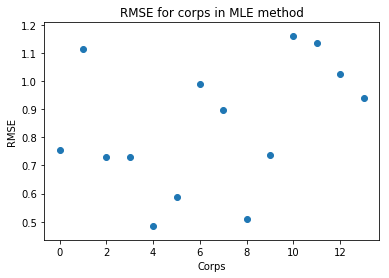

In [5]:
#MLE

lamda_cap = np.sum(train_set, axis = 1)/float(train_set.shape[1])            #finding lamda_cap using the MLE estimation
lamda_cap.shape = (train_set.shape[0],1)

#Calculating the Root mean sqrare error on the predictions(lamda_cap) for the test set
error = np.sqrt(np.sum((test_set-lamda_cap)**2, axis = 1)/float(test_set.shape[1]))
error.shape = (test_set.shape[0],1)

print('The learnt parametes are as follows:')
print(lamda_cap)
print('The RMSE error of the prediction for each corps are as follows:')
print(error)


plt.scatter(np.arange(14), error)
plt.title("RMSE for corps in MLE method")
plt.xlabel("Corps")
plt.ylabel("RMSE")
plt.show()

### MAP Estimation

The learnt parametes are as follows:
[[0.93333333]
 [0.66666667]
 [0.6       ]
 [0.6       ]
 [0.46666667]
 [0.4       ]
 [0.8       ]
 [0.53333333]
 [0.33333333]
 [0.66666667]
 [0.53333333]
 [0.93333333]
 [1.33333333]
 [0.33333333]]
The RMSE error of the prediction for each corps are as follows:
[[0.70688227]
 [1.11980724]
 [0.72899148]
 [0.72899148]
 [0.4866471 ]
 [0.57569833]
 [0.99139152]
 [0.89902946]
 [0.50395263]
 [0.73463089]
 [1.16237305]
 [1.17702881]
 [0.93435318]
 [0.93435318]]


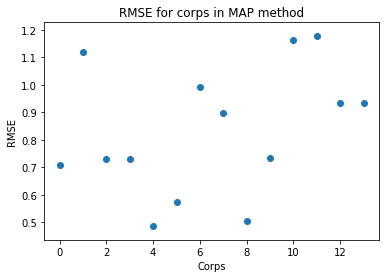

In [6]:
#MAP
k = np.sum(train_set, axis = 1)     #Total deaths in each respective corps
N = train_set.shape[1]              
alpha = 2
beta = 2

lamda_cap = (alpha-1+k)/float(beta+N)
lamda_cap.shape = (train_set.shape[0],1)

#Calculating the Root mean sqrare error on the predictions(lamda_cap) for the test set
error = np.sqrt(np.sum((test_set-lamda_cap)**2, axis = 1)/float(test_set.shape[1]))
error.shape = (test_set.shape[0],1)

print('The learnt parametes are as follows:')
print(lamda_cap)
print('The RMSE error of the prediction for each corps are as follows:')
print(error)

plt.scatter(np.arange(14), error)
plt.title("RMSE for corps in MAP method")
plt.xlabel("Corps")
plt.ylabel("RMSE")
plt.show()

### PLOTS 

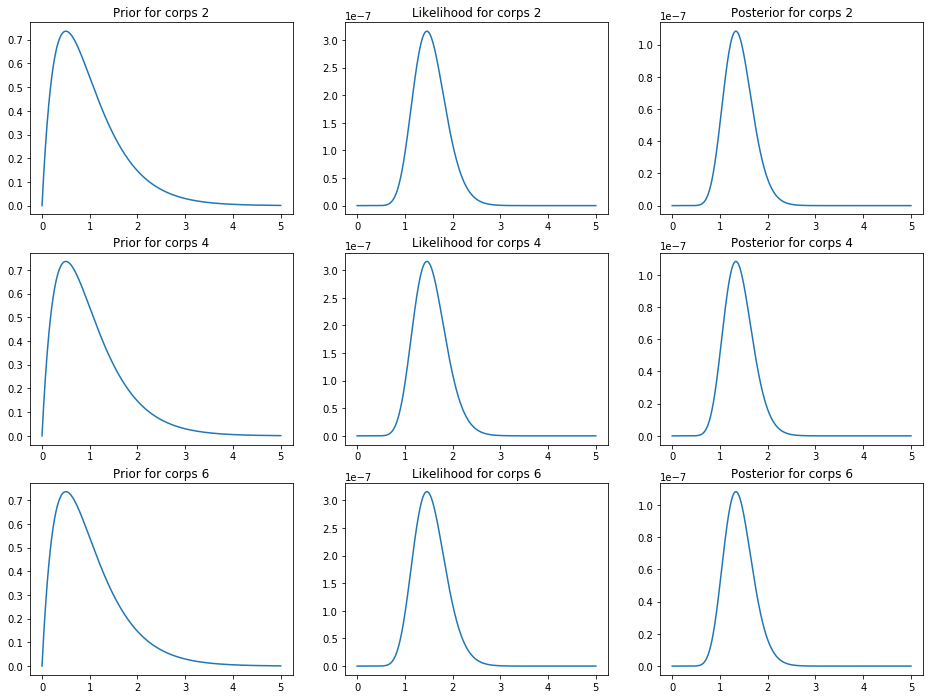

In [7]:
#PLOTS
x = np.linspace(0, 5, 1000)

def plots(alpha, beta, x, N, k, i):
    prior = (beta**alpha)/math.gamma(alpha)*x**(alpha-1)*np.exp(-1*beta*x)

    den = 1
    for i in range(train_set.shape[1]):
        den = den*np.math.factorial(train_set[1,i])
    likelihood = np.exp(-1*N*x)*(x**k[i])
    likelihood = likelihood/den

    posterior = prior * likelihood

    return prior, likelihood, posterior
    
    
fig,ax = plt.subplots(3,3,figsize=(16,12))
ax = ax.flatten()

#Plots for corps 2 
y = plots(alpha, beta, x, N, k, 2)

ax[0].plot(x, y[0])
ax[0].set_title("Prior for corps 2")
ax[1].plot(x, y[1])
ax[1].set_title("Likelihood for corps 2")
ax[2].plot(x, y[2])
ax[2].set_title("Posterior for corps 2")

#Plots for corps 4 
y = plots(alpha, beta, x, N, k, 4)

ax[3].plot(x, y[0])  
ax[3].set_title("Prior for corps 4")
ax[4].plot(x, y[1])
ax[4].set_title("Likelihood for corps 4")
ax[5].plot(x, y[2])
ax[5].set_title("Posterior for corps 4")

#Plots for corps 6 
y = plots(alpha, beta, x, N, k, 6)

ax[6].plot(x, y[0])  
ax[6].set_title("Prior for corps 6")
ax[7].plot(x, y[1])
ax[7].set_title("Likelihood for corps 6")
ax[8].plot(x, y[2])
ax[8].set_title("Posterior for corps 6")


plt.show()